In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)

In [2]:
# Load data
aggregated_data = pd.read_excel('aggregated_data.xlsx', sheet_name='Sheet1').drop(columns=['Team'])


Top 50 features most correlated with 'Trabajo Final' using pearson (ordered by absolute correlation):
                                 Trabajo Final
IsWeekend_mean                        0.439734
Word_Count_median                     0.410472
DTA_desacuerdo_mean                   0.395725
ContainsInappropriateWords_mean       0.373052
Word_Count_IQR                        0.373022
Word_Count_mean                       0.368248
DTA_fuera de tema_mean               -0.368209
Berger Score_std                      0.366040
Agreeableness_IQR                     0.350722
Neuroticism_median                   -0.335909
IsWeekend_sum                         0.331614
Agreeableness_kurtosis               -0.329789
Extraversion_median                   0.323927
Berger Score_median                  -0.320585
Word_Count_std                        0.293977
Extraversion_mean                     0.275350
Agreeableness_std                     0.271523
Sentiment Stars_kurtosis              0.246652
Neur

/var/folders/m5/6ts_hkp92fz_p2frmjjfjj9h0000gn/T/ipykernel_979/3543558616.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_x_corr_sorted.index, y=top_x_corr_sorted.values, palette="coolwarm")


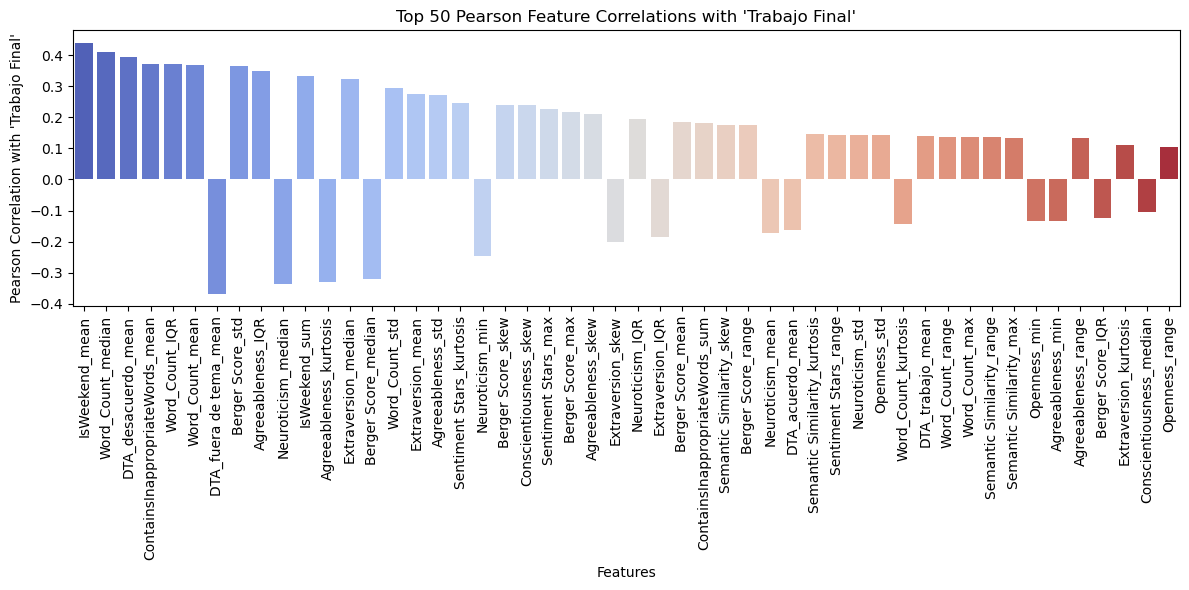

In [6]:
# Parameters
x = 50  # Top N features
target_column = 'Trabajo Final'
correlation_method = 'pearson'  # Options: 'pearson' or 'spearman'

# Compute correlation matrix
corr_matrix = aggregated_data.corr(method=correlation_method)

# Get correlation of all features with the target (excluding the target itself)
target_corr = corr_matrix[target_column].drop(target_column)

# Get top x features based on absolute correlation
top_x = target_corr.abs().nlargest(x).index

# Get actual signed correlations
top_x_corr = target_corr.loc[top_x]

# Sort features by absolute correlation (for plotting and list)
top_x_corr_sorted = top_x_corr.reindex(top_x_corr.abs().sort_values(ascending=False).index)

# Assign to variable for external use
top_corr_features = top_x_corr_sorted.index.tolist()

# Print feature names
print(f"\nTop {x} features most correlated with '{target_column}' using {correlation_method} (ordered by absolute correlation):")
top_corr_df = pd.DataFrame(top_x_corr_sorted)
print(top_corr_df)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_x_corr_sorted.index, y=top_x_corr_sorted.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel(f"{correlation_method.capitalize()} Correlation with '{target_column}'")
plt.title(f"Top {x} {correlation_method.capitalize()} Feature Correlations with '{target_column}'")
plt.tight_layout()
plt.show()

Top 50 Features by Coefficient of Variation (CV):
Agreeableness_kurtosis             5.480681
Agreeableness_skew                 5.393610
Sentiment Stars_skew               4.695806
Openness_kurtosis                  3.180121
Conscientiousness_kurtosis         2.890440
Extraversion_kurtosis              2.697708
ContainsInappropriateWords_sum     2.513619
Conscientiousness_skew             2.322555
DTA_trabajo_mean                   2.135713
Semantic Similarity_kurtosis       2.124410
Semantic Similarity_min            2.105792
DTA_trabajo_sum                    2.072751
Neuroticism_kurtosis               2.002006
Berger Score_median                1.949992
Openness_skew                      1.529349
Extraversion_skew                  1.477168
ContainsInappropriateWords_mean    1.456162
DTA_acuerdo_mean                   1.420363
IsWeekend_sum                      1.345185
Berger Score_kurtosis              1.308057
Neuroticism_skew                   1.274055
Word_Count_kurtosis       

/var/folders/m5/6ts_hkp92fz_p2frmjjfjj9h0000gn/T/ipykernel_979/3132203406.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cv.index, y=top_cv.values, palette="coolwarm")


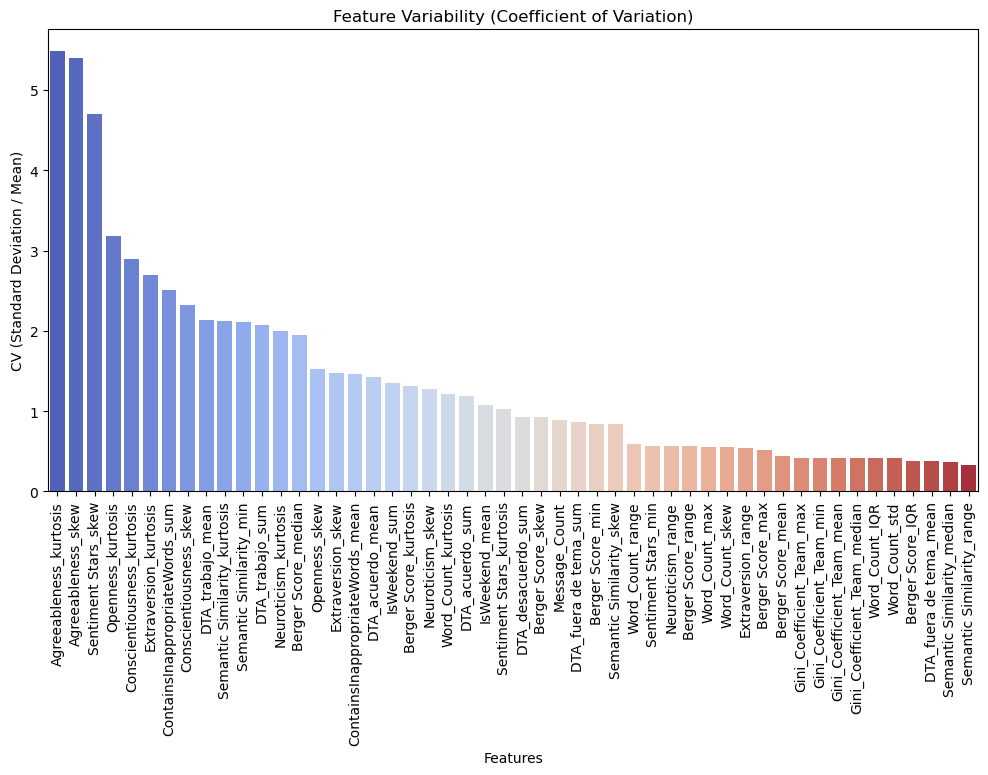

In [5]:
# Compute Coefficient of Variation (CV), avoiding division errors
feature_means = aggregated_data.drop(columns=['Trabajo Final']).mean()
feature_stds = aggregated_data.drop(columns=['Trabajo Final']).std()
cv = (feature_stds / feature_means).abs().sort_values(ascending=False)

# Get top features by CV
X = 50
top_cv = cv.nlargest(X)
top_cv_features = top_cv.index.tolist()
print(f"Top {X} Features by Coefficient of Variation (CV):")
print(cv.nlargest(X))

# Plot CV
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cv.index, y=top_cv.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("CV (Standard Deviation / Mean)")
plt.title("Feature Variability (Coefficient of Variation)")
plt.show()

In [104]:
overlap_features = list(set(top_corr_features) & set(top_cv_features))
#overlap_features = top_corr_features
#overlap_features = top_cv_features
print(f"{len(overlap_features)} overlapping features (both highly correlated with target and high variability):")
print(overlap_features)

overlap_corr_matrix = aggregated_data[overlap_features].corr()

threshold = 0.8
features_to_remove = set()

# Compute Coefficient of Variation for the overlapping
feature_means = aggregated_data[overlap_features].mean()
feature_stds = aggregated_data[overlap_features].std()
cv = (feature_stds / feature_means).abs()

# Loop through the correlation matrix and remove the feature with lower variance
for i in range(len(overlap_corr_matrix.columns)):
    for j in range(i):
        if abs(overlap_corr_matrix.iloc[i, j]) > threshold:
            # Compare the Coefficients of Variation to decide which to remove
            feature_i = overlap_corr_matrix.columns[i]
            feature_j = overlap_corr_matrix.columns[j]
            
            if cv[feature_i] < cv[feature_j]:
                features_to_remove.add(feature_i)
            else:
                features_to_remove.add(feature_j)

final_features = list(set(overlap_features) - features_to_remove)

print(f"Final set of selected features:")
print(final_features)


14 overlapping features (both highly correlated with target and high variability):
['Word_Count_kurtosis', 'Sentiment Stars_kurtosis', 'Berger Score_median', 'Conscientiousness_skew', 'IsWeekend_mean', 'ContainsInappropriateWords_mean', 'Agreeableness_kurtosis', 'ContainsInappropriateWords_sum', 'DTA_trabajo_mean', 'Semantic Similarity_kurtosis', 'Extraversion_skew', 'IsWeekend_sum', 'Agreeableness_skew', 'DTA_acuerdo_mean']
Final set of selected features:
['Word_Count_kurtosis', 'Sentiment Stars_kurtosis', 'Conscientiousness_skew', 'Berger Score_median', 'IsWeekend_mean', 'ContainsInappropriateWords_mean', 'Agreeableness_kurtosis', 'ContainsInappropriateWords_sum', 'DTA_trabajo_mean', 'Semantic Similarity_kurtosis', 'Extraversion_skew', 'IsWeekend_sum', 'Agreeableness_skew', 'DTA_acuerdo_mean']


In [69]:
# save file
file_name = "prediction_data.xlsx"
prediction_data = pd.read_excel('aggregated_data.xlsx', sheet_name='Sheet1')
prediction_data = prediction_data[final_features + ['Team', 'Trabajo Final']]
prediction_data.to_excel(file_name, index=False)